Data source: https://www.kaggle.com/datasets/austinreese/craigslist-carstrucks-data

Libraries:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
import statsmodels.api as sma 

Functions

In [2]:
def delete_column(x,dataframe):
    try:
        dataframe.drop(x, axis=1, inplace=True)
    except:
        pass 

Reading car prices data

In [4]:
df_base = pd.read_csv('vehicles.csv')
df_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [5]:
df_base['county'].value_counts()

Series([], Name: county, dtype: int64)

Cleaning part 1 

In [6]:
df = df_base.copy()
try:
    df = df.drop(['url','region_url','VIN','image_url','county','posting_date','description','id','region','lat','long','title_status'], axis=1)
except:
    pass
display(df.describe())

# Wartość odstająca znaleziona w Tableau
print(df["price"].max())

,price,year,odometer
count,4.268800e+05,425675.000000,4.224800e+05
mean,7.519903e+04,2011.235191,9.804333e+04
std,1.218228e+07,9.452120,2.138815e+05
min,0.000000e+00,1900.000000,0.000000e+00
25%,5.900000e+03,2008.000000,3.770400e+04
50%,1.395000e+04,2013.000000,8.554800e+04
75%,2.648575e+04,2017.000000,1.335425e+05
max,3.736929e+09,2022.000000,1.000000e+07


3736928711


Cleaning part 2

In [7]:
try:
    df['cylinders_num'] = df['cylinders'].str.split(' ', expand=True)[0]
    set(df.cylinders_num.values)
    df.drop('cylinders', axis=1, inplace=True)
    df.cylinders_num.replace(np.NaN, 'other', inplace=True)
    df = df[df.cylinders_num != 'other']
    df = df[df.transmission != 'other']
    df = df[df.price > 10]
    df = df[df.year > 1999]
    df = df[df.price < 1200000]
    df = df[df.price > 200]
    df = df[df.fuel != 'other']
    df['type'] = df['size'].str.upper()
    df.drop('size', axis=1, inplace=True)

    
    counts = df['model'].value_counts()
    df_ford = df[~df['model'].isin(counts[counts < 50].index)]
except:
    pass


try:
    df = df.drop(['paint_color'], axis=1)
    df.dropna(inplace=True)
except:
    pass

df.to_excel("vehicles.xlsx",index=False)
df.to_csv("vehicles2.csv",index=False)




Dividing the dataset on top 5 cars manufacturersa

In [29]:
try:
    df_ford = df[df.manufacturer == 'ford']
    df_chevrolet = df[df.manufacturer == 'chevrolet']
    df_toyota = df[df.manufacturer == 'toyota']
    df_honda = df[df.manufacturer == 'honda']
    df_nissan = df[df.manufacturer == 'nissan']

    df_ford = df_ford.reset_index()
    df_chevrolet = df_chevrolet.reset_index()
    df_toyota = df_toyota.reset_index()
    df_honda = df_honda.reset_index()
    df_nissan = df_nissan.reset_index()
except:
    pass



Ford Cleaning

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8509 entries, 0 to 8508
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                8509 non-null   int64  
 1   year                 8509 non-null   float64
 2   condition            8509 non-null   int64  
 3   odometer             8509 non-null   float64
 4   cylinders_num        8509 non-null   int64  
 5   diesel               8509 non-null   uint8  
 6   gas                  8509 non-null   uint8  
 7   hybrid               8509 non-null   uint8  
 8   COMPACT              8509 non-null   uint8  
 9   FULL-SIZE            8509 non-null   uint8  
 10  MID-SIZE             8509 non-null   uint8  
 11  SUB-COMPACT          8509 non-null   uint8  
 12  4wd                  8509 non-null   uint8  
 13  fwd                  8509 non-null   uint8  
 14  rwd                  8509 non-null   uint8  
 15  automatic            8509 non-null   u

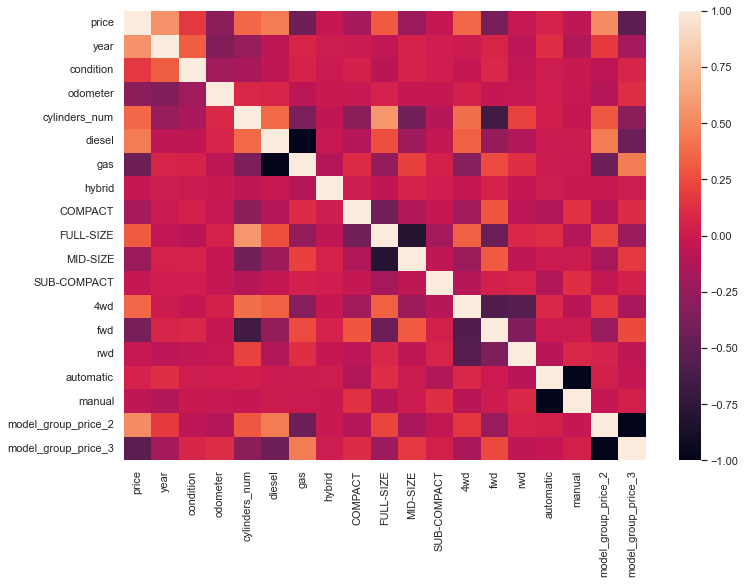

In [30]:
try:
    # Wyrzucenie marki pojazdu
    df_ford.drop('manufacturer', axis=1, inplace=True)

    # Zamiana zmiennych w numeryczne w kolumnie condition
    df_ford.condition.replace('new', 6, inplace=True)
    df_ford.condition.replace('like new', 5, inplace=True)
    df_ford.condition.replace('excellent', 4, inplace=True)
    df_ford.condition.replace('good', 3, inplace=True)
    df_ford.condition.replace('fair', 2, inplace=True)
    df_ford.condition.replace('salvage', 1, inplace=True)

    # Zamiana zmiennych na binerne z fuel
    df_fuel = pd.get_dummies(df_ford['fuel'])
    df_ford = df_ford.join(df_fuel)
    df_ford.drop('fuel', axis=1, inplace=True)

    # Zamiana typu samochodu na binarny
    df_type = pd.get_dummies(df_ford['type'])
    df_ford = df_ford.join(df_type)
    df_ford.drop('type', axis=1, inplace=True)

    # Zamiana napędu na zmienne binarne
    df_drive = pd.get_dummies(df_ford['drive'])
    df_ford = df_ford.join(df_drive)
    df_ford.drop('drive', axis=1, inplace=True)

    # Zamiana skrzyni biegów na binarną
    df_transmission = pd.get_dummies(df_ford['transmission'])
    df_ford = df_ford.join(df_transmission)
    df_ford.drop('transmission', axis=1, inplace=True)

    # Usunięcie modeli które posiadają mniejszą ilość obserwacji niż 50
    counts = df_ford['model'].value_counts()
    df_ford = df_ford[~df_ford['model'].isin(counts[counts < 50].index)]

    # Grupowanie modeli po średniej cenie
    df_ford_model = df_ford[["price","model"]]
    df_ford_model = df_ford_model.groupby(by="model", dropna=False).mean()

    # Reserowanie indexu
    df_ford_model = df_ford_model.reset_index()

    # Grupowanie modeli samochodów po ich średniej cenie (ewentualnie do wywalenia)
    df_ford_model["model_group_price_1"] = np.where(df_ford_model.price > 55824.5, 1,0)
    df_ford_model["model_group_price_2"] = np.where((df_ford_model.price > 27912.25) & (df_ford_model.price < 55824.5), 1,0)
    df_ford_model["model_group_price_3"] = np.where(df_ford_model.price <= 27912.25, 1,0)
    df_check_model = df_ford_model.copy()
    df_ford_model.drop('price', axis=1, inplace=True)
    df_ford = df_ford.merge(df_ford_model, on='model')

    # Usuwanie zmiennej model z modelu
    df_ford.drop('model', axis=1, inplace=True)

    # Usuwanie zmiennej state z data setu
    df_ford.drop('state', axis=1, inplace=True)

    # Usuwanie indexu
    df_ford.drop('index', axis=1, inplace=True)

    # Ustawienie zmiennej jako numerycznej
    df_ford['cylinders_num'] = pd.to_numeric(df_ford['cylinders_num'])

    # Zmiana formatu zmiennej year
    df_ford['year'] = df_ford['year']-2000 

    # Usunięcie zmiennych których nie było
    df_ford.drop('model_group_price_1', axis=1, inplace=True)
    df_ford.drop('electric', axis=1, inplace=True)
  
except:
    pass

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(df_ford.corr());

print(df_ford.info())


Ford model

In [36]:
df_ford_linear = df_ford.copy()

try:
    df_ford_linear.drop('price', axis=1, inplace=True)
except:
    pass

# Usuwanie zmiennych które maja p-v > 5%
delete_column('SUB-COMPACT',df_ford_linear)
delete_column('FULL-SIZE',df_ford_linear)

# Usuwanie wspóliniowości
delete_column('gas',df_ford_linear)
delete_column('4wd',df_ford_linear)
delete_column('automatic',df_ford_linear)

# Finalny model
X = np.column_stack(df_ford_linear)
x2 = sma.add_constant(df_ford_linear)
y = df_ford['price']

model = sma.OLS(y,x2)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     1871.
Date:                Mon, 19 Dec 2022   Prob (F-statistic):               0.00
Time:                        21:31:49   Log-Likelihood:                -87791.
No. Observations:                8509   AIC:                         1.756e+05
Df Residuals:                    8496   BIC:                         1.757e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -8940.8892    

In [37]:
display(df_check_model)

,model,price,model_group_price_1,model_group_price_2,model_group_price_3
0,crown victoria,4671.969697,0,0,1
1,crown victoria police,4512.080000,0,0,1
2,econoline,15329.287234,0,0,1
3,econoline cargo van,19282.570093,0,0,1
4,econoline commercial cutaway,22932.135922,0,0,1
5,edge,12402.063830,0,0,1
6,edge sel,12398.975309,0,0,1
7,escape,9449.550439,0,0,1
8,escape se,11209.439560,0,0,1
9,escape xlt,5207.282443,0,0,1
